# Equations with first order term

In [1]:
!poetry --version > /dev/null 2> /dev/null || pip install poetry
!python -c 'import notebooks_lib' 2> /dev/null || pip install git+https://github.com/gbonnet1/notebooks.git

In [2]:
import agd.LinearParallel as lp
import matplotlib.pyplot as plt
import numpy as np
from agd import Domain, Selling
from agd.AutomaticDifferentiation import Dense2, Sparse
from agd.AutomaticDifferentiation.Optimization import newton_root, stop_default

In [3]:
def u_c4(x):
    return np.where(
        lp.dot_VV(x, x) < 1,
        lp.dot_VV(x, x) ** (3 / 2),
        1 / 10
        - 1 / 2 * lp.dot_VV(x, x) ** (1 / 2)
        + lp.dot_VV(x, x) ** (2 / 2)
        + 1 / 2 * lp.dot_VV(x, x) ** (4 / 2)
        - 1 / 10 * lp.dot_VV(x, x) ** (5 / 2),
    )


def u_c3(x):
    return np.where(
        lp.dot_VV(x, x) < 1,
        lp.dot_VV(x, x) ** (3 / 2),
        1 / 6
        - 2 / 3 * lp.dot_VV(x, x) ** (1 / 2)
        + lp.dot_VV(x, x) ** (2 / 2)
        + 1 / 3 * lp.dot_VV(x, x) ** (3 / 2)
        + 1 / 6 * lp.dot_VV(x, x) ** (4 / 2),
    )


def u_c2(x):
    return np.where(
        lp.dot_VV(x, x) < 1,
        lp.dot_VV(x, x) ** (3 / 2),
        1 / 3
        - lp.dot_VV(x, x) ** (1 / 2)
        + lp.dot_VV(x, x) ** (2 / 2)
        + 2 / 3 * lp.dot_VV(x, x) ** (3 / 2),
    )


mu = 0.1
h_max = mu ** (3 / 2) / 2


def omega(x):
    return lp.dot_AV(
        lp.rotation(np.pi * x[0] / 2), np.multiply.outer([1, 0], np.ones(x.shape[1:]))
    )


def D(x):
    return lp.dot_AA(
        lp.rotation(np.pi * x[1] / 2),
        lp.dot_AA(
            np.multiply.outer([[1, 0], [0, mu]], np.ones(x.shape[1:])),
            lp.transpose(lp.rotation(np.pi * x[1] / 2)),
        ),
    )


def EqLinear(u_func, x):
    x_ad = Dense2.identity(constant=x, shape_free=x.shape[:1])
    u_ad = u_func(x_ad)
    u = u_ad.value
    du = np.moveaxis(u_ad.coef1, -1, 0)
    d2u = np.moveaxis(u_ad.coef2, [-2, -1], [0, 1])
    return u - lp.dot_VV(omega(x), du) - lp.trace(lp.dot_AA(D(x), d2u))


def SchemeLinear(u, x, f, bc):
    coef, offsets = Selling.Decomposition(D(x))
    du = bc.DiffCentered(u, offsets)
    d2u = bc.Diff2(u, offsets)
    return np.where(
        bc.interior,
        u
        - lp.dot_VAV(omega(x), lp.inverse(D(x)), np.sum(coef * du * offsets, axis=1))
        - lp.dot_VV(coef, d2u)
        - f,
        u - bc.grid_values,
    )


def SolveLinear(x, f, bc):
    u = Sparse.identity(constant=np.zeros(x.shape[1:]))
    residue = SchemeLinear(u, x, f, bc)
    return residue.solve()

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


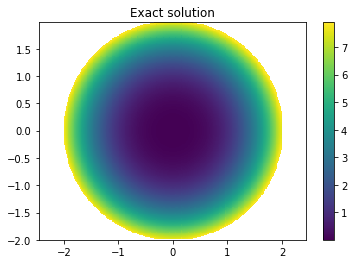

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


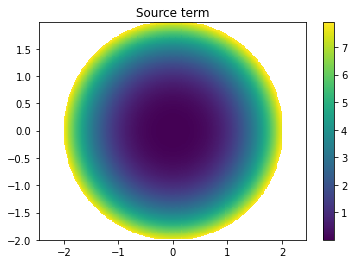

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


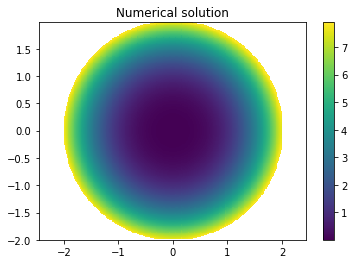

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


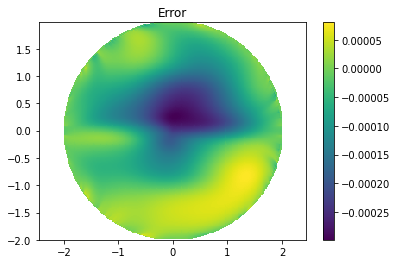

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


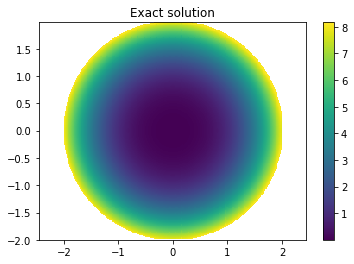

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


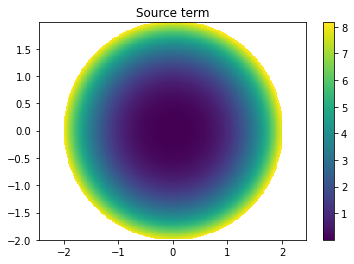

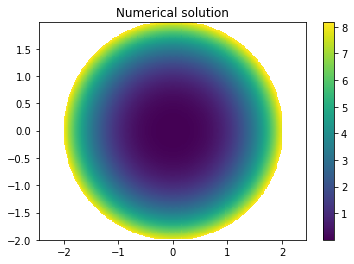

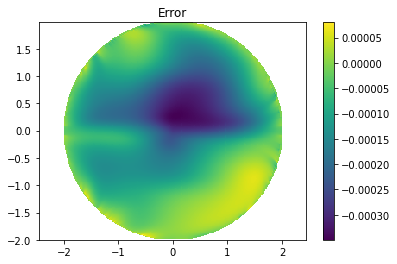

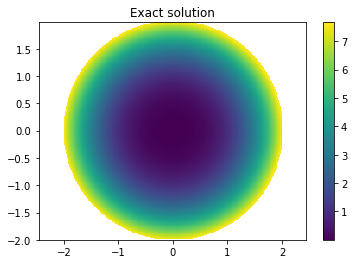

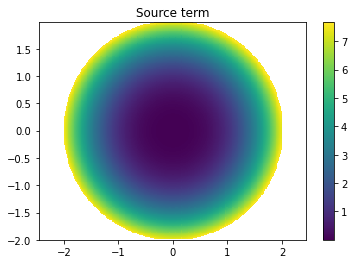

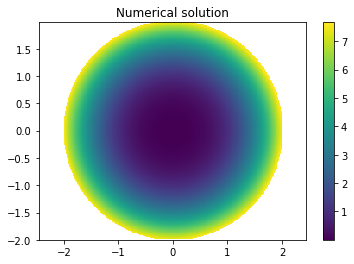

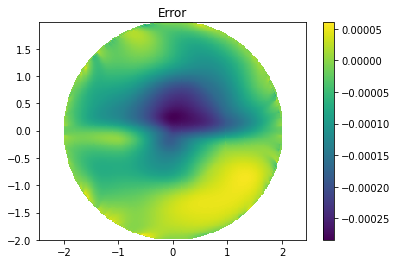

In [4]:
for u_func in [u_c4, u_c3, u_c2]:
    x = np.stack(
        np.meshgrid(np.arange(-2, 2, h_max), np.arange(-2, 2, h_max), indexing="ij")
    )

    domain = Domain.Ball(radius=2)
    bc = Domain.Dirichlet(domain, u_func, x)

    u = u_func(x)
    f = EqLinear(u_func, x)

    plt.title("Exact solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Source term")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    u_approx = SolveLinear(x, f, bc)

    plt.title("Numerical solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Error")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u - u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

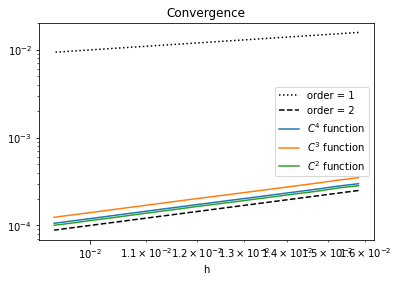

In [5]:
h = h_max / 2 ** np.arange(0, 0.8, 0.05)

plt.title("Convergence")
plt.xlabel("h")
plt.loglog(h, h, "k:", label="order = 1")
plt.loglog(h, h ** 2, "k--", label="order = 2")

for u_func, label in [
    (u_c4, "$C^4$ function"),
    (u_c3, "$C^3$ function"),
    (u_c2, "$C^2$ function"),
]:
    err = np.zeros(h.shape)

    for i in range(len(h)):
        x = np.stack(
            np.meshgrid(np.arange(-2, 2, h[i]), np.arange(-2, 2, h[i]), indexing="ij")
        )

        domain = Domain.Ball(radius=2)
        bc = Domain.Dirichlet(domain, u_func, x)

        u = u_func(x)
        f = EqLinear(u_func, x)

        u_approx = SolveLinear(x, f, bc)

        err[i] = np.max(np.abs(np.where(bc.interior, u - u_approx, 0)))

    plt.loglog(h, err, label=label)

plt.legend()
plt.show()

## With solutions from literature

In [6]:
def u_smooth(x):
    return lp.dot_VV(x, x) ** 2


domain_smooth = Domain.AffineTransform(
    Domain.Union(Domain.Ball(), Domain.Box()), lp.rotation(1 / 3)
)
limits_smooth = [[-1, 1], [-1, 1.4]]


def u_c1(x):
    return np.maximum(0, np.sqrt(lp.dot_VV(x, x)) - 0.2) ** 2


domain_c1 = Domain.AffineTransform(
    Domain.Box([[-0.5, 0.5], [-0.5, 0.5]]), lp.rotation(1 / 3)
)
limits_c1 = [[-0.7, 0.7], [-0.7, 0.7]]


def u_singular(x):
    y = lp.dot_AV(np.multiply.outer(lp.rotation(-1 / 3), np.ones(x.shape[1:])), x) + 0.5
    return np.sqrt(2 - lp.dot_VV(y, y))


domain_singular = Domain.AffineTransform(
    Domain.Box([[-0.5, 0.5], [-0.5, 0.5]]), lp.rotation(1 / 3)
)
limits_singular = [[-0.7, 0.7], [-0.7, 0.7]]

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


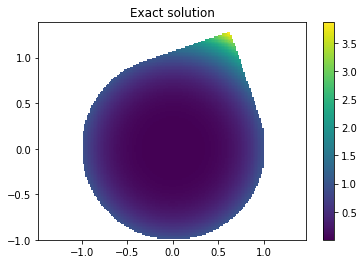

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


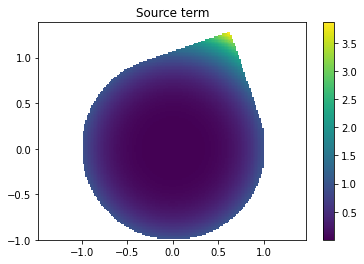

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


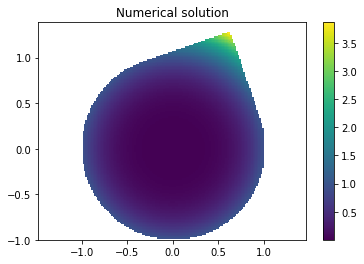

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


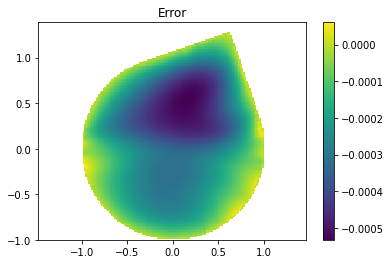

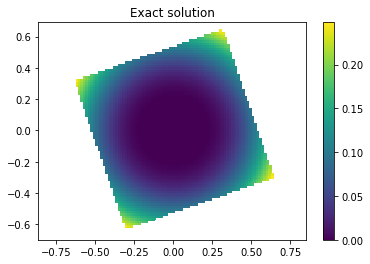

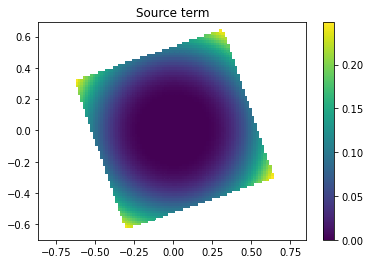

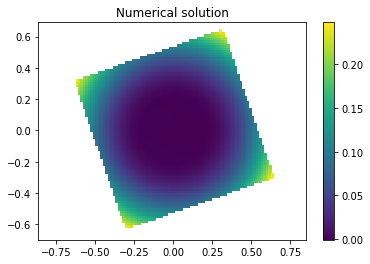

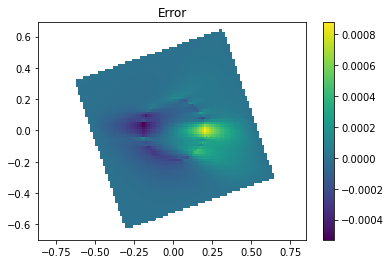

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in sqrt
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in power
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))


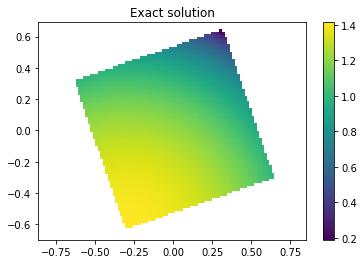

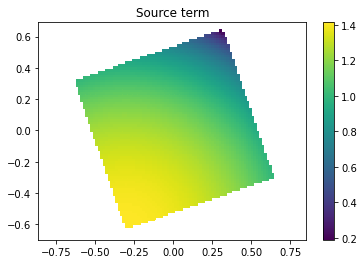

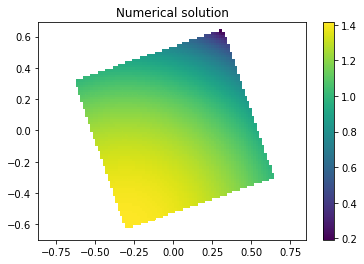

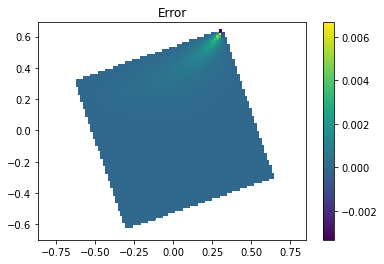

In [7]:
for u_func, domain, limits in [
    (u_smooth, domain_smooth, limits_smooth),
    (u_c1, domain_c1, limits_c1),
    (u_singular, domain_singular, limits_singular),
]:
    x = np.stack(
        np.meshgrid(
            np.arange(*limits[0], h_max), np.arange(*limits[1], h_max), indexing="ij"
        )
    )

    bc = Domain.Dirichlet(domain, u_func, x)

    u = u_func(x)
    f = EqLinear(u_func, x)

    plt.title("Exact solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Source term")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    u_approx = SolveLinear(x, f, bc)

    plt.title("Numerical solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Error")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u - u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

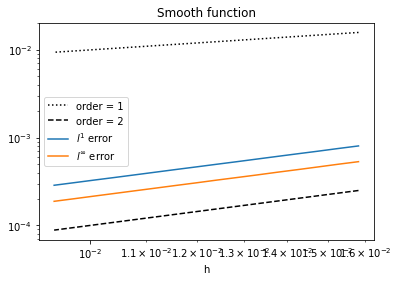

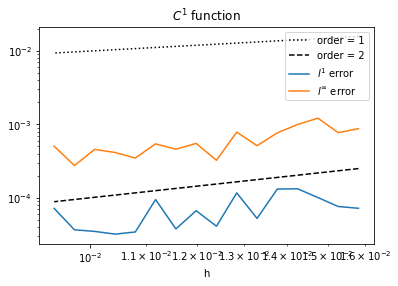

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in sqrt
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in power
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))


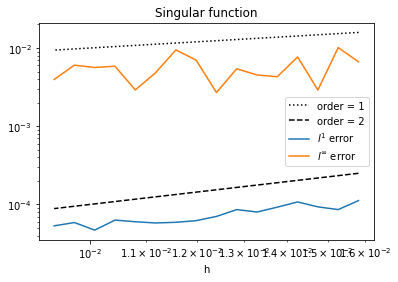

In [8]:
for u_func, domain, limits, title in [
    (u_smooth, domain_smooth, limits_smooth, "Smooth function"),
    (u_c1, domain_c1, limits_c1, "$C^1$ function"),
    (u_singular, domain_singular, limits_singular, "Singular function"),
]:
    h = h_max / 2 ** np.arange(0, 0.8, 0.05)
    err_l1 = np.zeros(h.shape)
    err_linf = np.zeros(h.shape)

    for i in range(len(h)):
        x = np.stack(
            np.meshgrid(
                np.arange(*limits[0], h[i]), np.arange(*limits[1], h[i]), indexing="ij"
            )
        )

        bc = Domain.Dirichlet(domain, u_func, x)

        u = u_func(x)
        f = EqLinear(u_func, x)

        u_approx = SolveLinear(x, f, bc)

        err_l1[i] = h[i] ** 2 * np.sum(np.abs(np.where(bc.interior, u - u_approx, 0)))
        err_linf[i] = np.max(np.abs(np.where(bc.interior, u - u_approx, 0)))

    plt.title(title)
    plt.xlabel("h")
    plt.loglog(h, h, "k:", label="order = 1")
    plt.loglog(h, h ** 2, "k--", label="order = 2")
    plt.loglog(h, err_l1, label="$l^1$ error")
    plt.loglog(h, err_linf, label="$l^\infty$ error")
    plt.legend()
    plt.show()

## Nonlinear problem

In [9]:
def EqNonlinear(u_func, x):
    x_ad = Dense2.identity(constant=x, shape_free=x.shape[:1])
    u_ad = u_func(x_ad)
    u = u_ad.value
    du = np.moveaxis(u_ad.coef1, -1, 0)
    d2u = np.moveaxis(u_ad.coef2, [-2, -1], [0, 1])
    return u + np.sqrt(lp.dot_VV(du, du)) - lp.trace(lp.dot_AA(D(x), d2u))


def SchemeNonlinear(u, x, f, bc):
    coef, offsets = Selling.Decomposition(D(x))
    du = bc.DiffCentered(u, offsets)
    d2u = bc.Diff2(u, offsets)
    p = lp.dot_AV(lp.inverse(D(x)), np.sum(coef * du * offsets, axis=1))
    return np.where(
        bc.interior,
        u + np.sqrt(lp.dot_VV(p, p)) - lp.dot_VV(coef, d2u) - f,
        u - bc.grid_values,
    )


def SolveNonlinear(x, f, bc):
    return newton_root(
        SchemeNonlinear,
        lp.dot_VV(x, x),
        params=(x, f, bc),
        stop=stop_default(residue_tol=1e-7),
    )

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


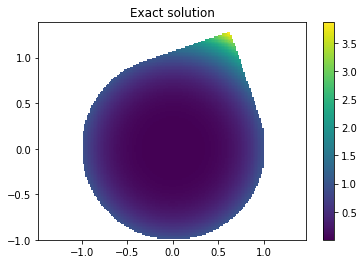

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


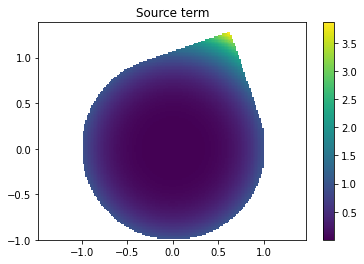

Iteration: 1  Residue norm: 16.369934820749172
Iteration: 2  Residue norm: 0.0004549473482846622
Iteration: 3  Residue norm: 4.714921786330706e-10
Target residue reached. Terminating.


/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


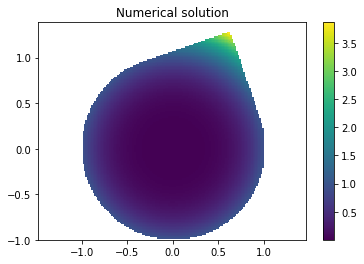

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


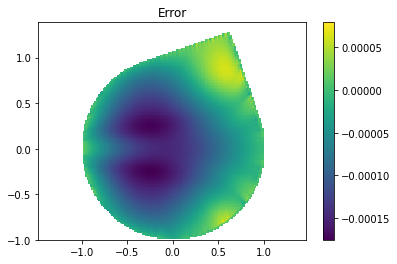

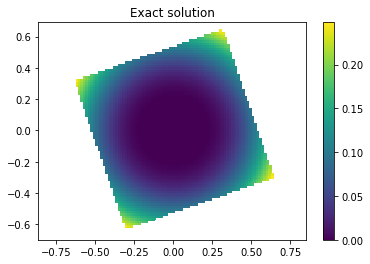

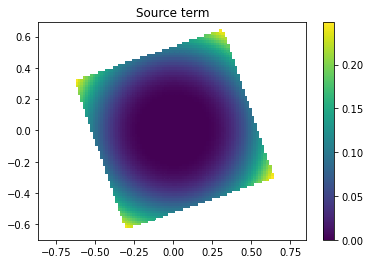

Iteration: 1  Residue norm: 1.9021683221169092
Iteration: 2  Residue norm: 0.002034405296291286
Iteration: 3  Residue norm: 3.006800505995534e-08
Target residue reached. Terminating.


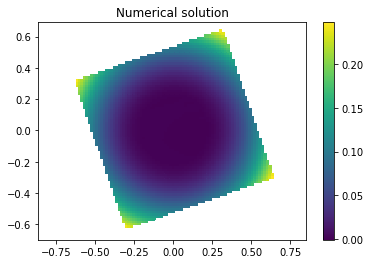

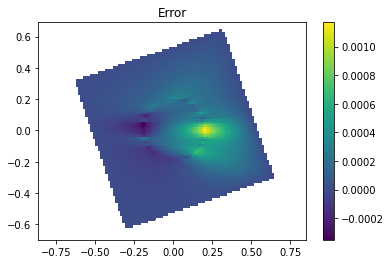

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in sqrt
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in power
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))


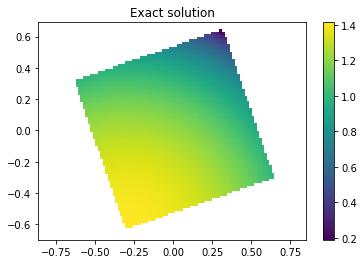

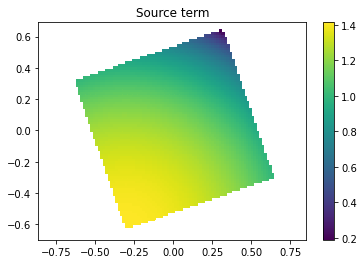

Iteration: 1  Residue norm: 9.54825421007255
Iteration: 2  Residue norm: 0.15499455209878654
Iteration: 3  Residue norm: 0.0015528248897731523
Iteration: 4  Residue norm: 5.4268697979864555e-08
Target residue reached. Terminating.


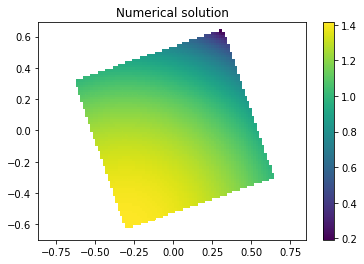

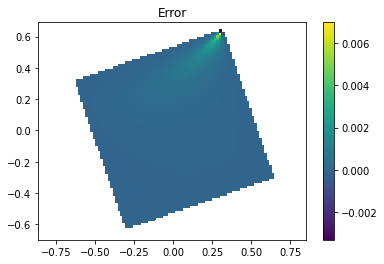

In [10]:
for u_func, domain, limits in [
    (u_smooth, domain_smooth, limits_smooth),
    (u_c1, domain_c1, limits_c1),
    (u_singular, domain_singular, limits_singular),
]:
    x = np.stack(
        np.meshgrid(
            np.arange(*limits[0], h_max), np.arange(*limits[1], h_max), indexing="ij"
        )
    )

    bc = Domain.Dirichlet(domain, u_func, x)

    u = u_func(x)
    f = EqNonlinear(u_func, x)

    plt.title("Exact solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Source term")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u, np.nan))
    plt.colorbar(im)
    plt.show()

    u_approx = SolveNonlinear(x, f, bc)

    plt.title("Numerical solution")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

    plt.title("Error")
    plt.axis("equal")
    im = plt.pcolormesh(*x, np.where(bc.interior, u - u_approx, np.nan))
    plt.colorbar(im)
    plt.show()

Iteration: 1  Residue norm: 16.369934820749172
Iteration: 2  Residue norm: 0.0004549473482846622
Iteration: 3  Residue norm: 4.714921786330706e-10
Target residue reached. Terminating.
Iteration: 1  Residue norm: 16.234312659032476
Iteration: 2  Residue norm: 0.00048792507469030966
Iteration: 3  Residue norm: 1.2088321454939432e-09
Target residue reached. Terminating.
Iteration: 1  Residue norm: 15.934644819402301
Iteration: 2  Residue norm: 0.0005517185180536899
Iteration: 3  Residue norm: 4.737670586786938e-10
Target residue reached. Terminating.
Iteration: 1  Residue norm: 16.887396675576507
Iteration: 2  Residue norm: 0.0008370110960989052
Iteration: 3  Residue norm: 4.1129773024894956e-10
Target residue reached. Terminating.
Iteration: 1  Residue norm: 16.044087368978722
Iteration: 2  Residue norm: 0.0004454037378902598
Iteration: 3  Residue norm: 8.900133963152257e-10
Target residue reached. Terminating.
Iteration: 1  Residue norm: 16.398357541717168
Iteration: 2  Residue norm: 0.

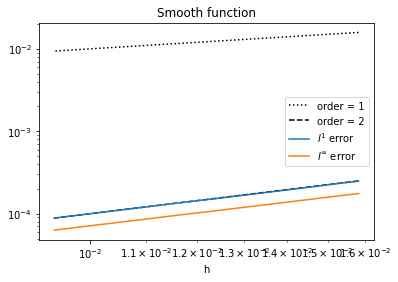

Iteration: 1  Residue norm: 1.9021683221169092
Iteration: 2  Residue norm: 0.002034405296291286
Iteration: 3  Residue norm: 3.006800505995534e-08
Target residue reached. Terminating.
Iteration: 1  Residue norm: 1.877570611666852
Iteration: 2  Residue norm: 0.002318910943507113
Iteration: 3  Residue norm: 1.0826174026728921e-06
Iteration: 4  Residue norm: 1.886268918838141e-12
Target residue reached. Terminating.
Iteration: 1  Residue norm: 1.8962672178176798
Iteration: 2  Residue norm: 0.0017235421499501857
Iteration: 3  Residue norm: 5.451742498791359e-07
Iteration: 4  Residue norm: 6.720846101870848e-12
Target residue reached. Terminating.
Iteration: 1  Residue norm: 1.8930098802035393
Iteration: 2  Residue norm: 0.001739318426864811
Iteration: 3  Residue norm: 4.2012062898705033e-07
Iteration: 4  Residue norm: 1.0997980304239263e-11
Target residue reached. Terminating.
Iteration: 1  Residue norm: 1.9033076110499298
Iteration: 2  Residue norm: 0.001960531238745622
Iteration: 3  Resid

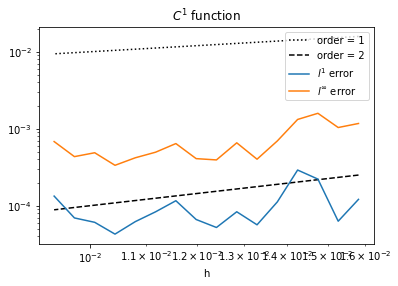

/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in sqrt
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))
/Users/guillaume/.pyenv/versions/3.6.10/envs/notebooks/lib/python3.6/site-packages/agd/AutomaticDifferentiation/Base.py:42: RuntimeWarning: invalid value encountered in power
  def pow(x,n):	return (x**n,n*x**(n-1),(n*(n-1))*x**(n-2))


Iteration: 1  Residue norm: 9.54825421007255
Iteration: 2  Residue norm: 0.15499455209878654
Iteration: 3  Residue norm: 0.0015528248897731523
Iteration: 4  Residue norm: 5.4268697979864555e-08
Target residue reached. Terminating.
Iteration: 1  Residue norm: 10.035170400614781
Iteration: 2  Residue norm: 0.15623086677023856
Iteration: 3  Residue norm: 0.0015660156580317164
Iteration: 4  Residue norm: 5.448122752937934e-08
Target residue reached. Terminating.
Iteration: 1  Residue norm: 9.902923858986085
Iteration: 2  Residue norm: 0.15616993250693634
Iteration: 3  Residue norm: 0.001566234803450417
Iteration: 4  Residue norm: 5.476064579568174e-08
Target residue reached. Terminating.
Iteration: 1  Residue norm: 10.209905020301314
Iteration: 2  Residue norm: 0.15526422456149813
Iteration: 3  Residue norm: 0.0015530821170179898
Iteration: 4  Residue norm: 5.4294674534105525e-08
Target residue reached. Terminating.
Iteration: 1  Residue norm: 9.587909615522562
Iteration: 2  Residue norm: 

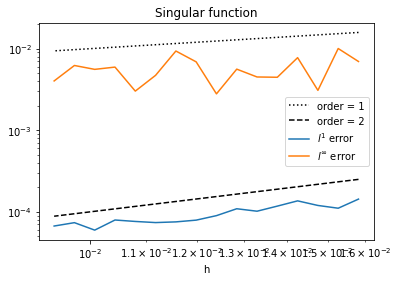

In [11]:
for u_func, domain, limits, title in [
    (u_smooth, domain_smooth, limits_smooth, "Smooth function"),
    (u_c1, domain_c1, limits_c1, "$C^1$ function"),
    (u_singular, domain_singular, limits_singular, "Singular function"),
]:
    h = h_max / 2 ** np.arange(0, 0.8, 0.05)
    err_l1 = np.zeros(h.shape)
    err_linf = np.zeros(h.shape)

    for i in range(len(h)):
        x = np.stack(
            np.meshgrid(
                np.arange(*limits[0], h[i]), np.arange(*limits[1], h[i]), indexing="ij"
            )
        )

        bc = Domain.Dirichlet(domain, u_func, x)

        u = u_func(x)
        f = EqNonlinear(u_func, x)

        u_approx = SolveNonlinear(x, f, bc)

        err_l1[i] = h[i] ** 2 * np.sum(np.abs(np.where(bc.interior, u - u_approx, 0)))
        err_linf[i] = np.max(np.abs(np.where(bc.interior, u - u_approx, 0)))

    plt.title(title)
    plt.xlabel("h")
    plt.loglog(h, h, "k:", label="order = 1")
    plt.loglog(h, h ** 2, "k--", label="order = 2")
    plt.loglog(h, err_l1, label="$l^1$ error")
    plt.loglog(h, err_linf, label="$l^\infty$ error")
    plt.legend()
    plt.show()